## Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

## Getting to know more our data

Here, we are importing our dataset using pandas and extracting some information using the methods **.head(30)**, **.info()** and **.describe()**. The method **.head(30)** will give us the 30 first rows of our dataset, so we can get to know which are the variables included on it as well as its values. The **.info()** method will give us information such as the datatyes of the values included in the columns of the dataframe, the number of rows and columns as well as how many are non null values. Finally, the **.describe()** method will give us some summary statistics on the columns of our dataset.

In [2]:
auto_dataframe = pd.read_csv("auto-mpg.data.csv", sep=";")
print(auto_dataframe.head(30))
auto_dataframe.info()
auto_dataframe.describe()

     mpg  cylinders  displacement horsepower  weight  acceleration  \
0   18.0          8         307.0        130    3504          12.0   
1   15.0          8         350.0        165    3693          11.5   
2   18.0          8         318.0        150    3436          11.0   
3   16.0          8         304.0        150    3433          12.0   
4   17.0          8         302.0        140    3449          10.5   
5   15.0          8         429.0        198    4341          10.0   
6   14.0          8         454.0        220    4354           9.0   
7   14.0          8         440.0        215    4312           8.5   
8   14.0          8         455.0        225    4425          10.0   
9   15.0          8         390.0        190    3850           8.5   
10  15.0          8         383.0        170    3563          10.0   
11  14.0          8         340.0        160    3609           8.0   
12  15.0          8         400.0        150    3761           9.5   
13  14.0          8 

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## Transforming categorical data, filling null values and dropping irrelevant columns

In this cell, firstly we are changing the values that are **'?'** in the horsepower column to NaN. After changing them to NaN, since these values are considered as strings when performing the **.info()** method on our dataframe, we are changing them to floats. After changing them to floats, we can fill the **NaN** values with the mean of the column. After doing this, since **origin** and **model year** are perceived as categorical columns, since having a bigger origin (1, 2, 3) does not imply having more **mpg** or more **model year** more **mpg**, we transform them into categorical columns with **astype(str)**. We also drop the irrelevant column **car name**, since we have all the characteristics of the car needed on the rest of the columns. Finally, since any machine learning model can not deal with categorical values we use **onehotencoding** to transform the categorical columns **origin** and **model year** to numerical ones with the pandas function **get_dummies()**.

In [3]:
for i in range(0, len(auto_dataframe["horsepower"])):
    if auto_dataframe["horsepower"][i] == '?':
        auto_dataframe["horsepower"][i] = np.NaN
    else:
        pass
auto_dataframe.info()
auto_dataframe["horsepower"] = pd.to_numeric(auto_dataframe["horsepower"])
auto_dataframe["horsepower"] = auto_dataframe["horsepower"].fillna(auto_dataframe["horsepower"].mean())
auto_dataframe["origin"] = auto_dataframe["origin"].astype(str)
auto_dataframe["model year"] = auto_dataframe["model year"].astype(str)
auto_dataframe = auto_dataframe.drop(["car name"], axis = 1)
auto_dataframe.info()
auto_dataframe = pd.get_dummies(auto_dataframe) 
print(auto_dataframe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null object
origin          398 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 25.0+ KB
      mpg  cylinders  displacement  horsepower  weigh

C:\Users\Alex\FinalAnaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Getting to know the distribution of our features

After having transformed our dataset for use, we need to know the distribution of our features, if it is normal or if it is not. We can get to know this by plotting them with some histograms. As it is shown in the graphs, the only feature that seems to be following a normal distribution is the **acceleration**, the rest do not follow it.

In [4]:
def histogram_plotting(dataframe, column, name, number_of_bins):
    dataframe[column].plot.hist(bins=number_of_bins)
    plt.xlabel(name)
    plt.show

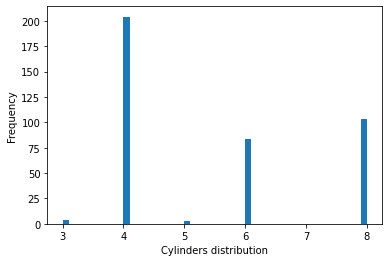

In [5]:
histogram_plotting(auto_dataframe, 'cylinders', 'Cylinders distribution', 50)

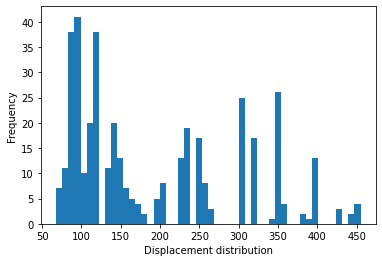

In [6]:
histogram_plotting(auto_dataframe, 'displacement', 'Displacement distribution', 50)

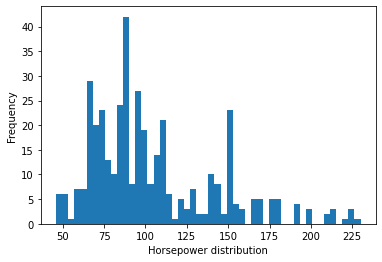

In [7]:
histogram_plotting(auto_dataframe, 'horsepower', 'Horsepower distribution', 50)

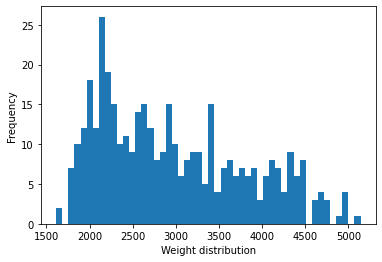

In [8]:
histogram_plotting(auto_dataframe, 'weight', 'Weight distribution', 50)

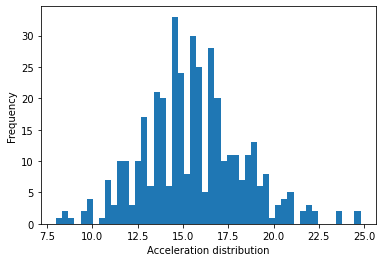

In [9]:
histogram_plotting(auto_dataframe, 'acceleration', 'Acceleration distribution', 50)

## Plotting of the different features towards mpg

This will allow us to see the relationship between each feature (cylinders, displacement, weight, acceleration, horsepower, origin, model year) and the target variable, in order to know which model will be the best to fit our data.

In [10]:
def plotting_one_variable_against_the_other(dataframe, variable1, variable2, title):
    x = dataframe[variable1]
    y_scatter = dataframe[variable2]
    plt.scatter(x, y_scatter)
    plt.title(title)
    plt.xlabel(variable1)
    plt.ylabel(variable2)
    plt.show()

In [11]:
def Linear_Regression_model_with_plotting(dataframe, predictor, target, color1, color2):
    X = dataframe[predictor].to_numpy().reshape(-1,1)
    y = dataframe[target]
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # plotting the model
    plt.scatter(X_test, y_test, color = color1, label = "test")
    plt.scatter(X_train, y_train, color = color2, label = "train")
    plt.legend()
    # sort before plotting the "line"
    ix = np.argsort(X_test.ravel())
    X_test = np.take(X_test, ix)
    y_pred = np.take(y_pred, ix)
    plt.plot(X_test, y_pred, linewidth = 3)
    plt.show()
    return r2, mse;

In [12]:
def Linear_Regression_model(dataframe, predictor, target):
    X = dataframe[predictor]
    y = dataframe[target]
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return r2, mse;

### - Cylinders vs mpg

As it can be seen in the following scatter plot, the relationship between cylinders and mpg is not linear, therefore when fitting a linearRegression model we should not get a good result, which will be proved.

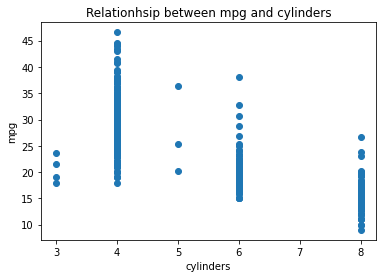

In [13]:
plotting_one_variable_against_the_other(auto_dataframe, 'cylinders', 'mpg', 'Relationhsip between mpg and cylinders')

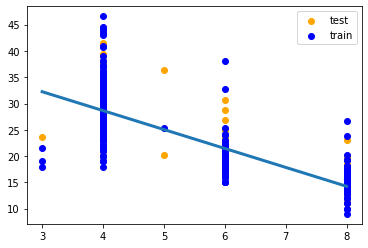

The r2 of the model is:  0.6429405757321645
The MSE of the model is:  20.87617253020112


In [14]:
r2, mse = Linear_Regression_model_with_plotting(auto_dataframe, "cylinders", "mpg", "orange", "blue")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

### - Displacement vs mpg

As it can be seen in the following scatter plot, the relationship between displacement and mpg is not linear, but follows a tendency to linearity, therefore its score when fitting a linearRegression model should be better than the one we obtained with cylinders, which will be proved.

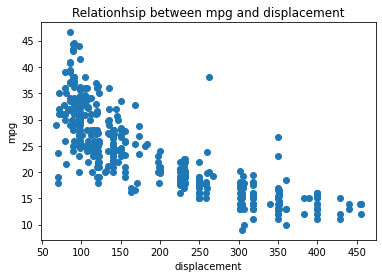

In [15]:
plotting_one_variable_against_the_other(auto_dataframe, 'displacement', 'mpg', 'Relationhsip between mpg and displacement')

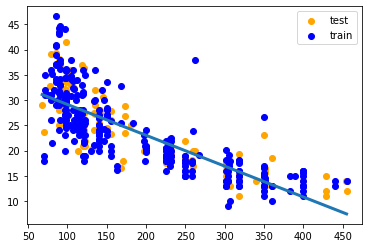

The r2 of the model is:  0.6949301767586248
The MSE of the model is:  17.836499559713793


In [16]:
r2, mse = Linear_Regression_model_with_plotting(auto_dataframe, "displacement", "mpg", "orange", "blue")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

### - Weight vs mpg

As it can be seen in the following scatter plot, the relationship between weight and mpg is not linear, but follows a tendency to linearity, therefore its score when fitting a linearRegression model should be better than the one we obtained with cylinders and it seems to be more linear than the one of displacements, so we should also obtain a better score than that one as well, which will be proved.

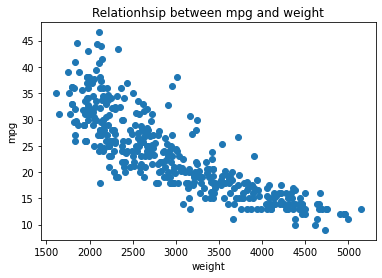

In [17]:
plotting_one_variable_against_the_other(auto_dataframe, 'weight', 'mpg', 'Relationhsip between mpg and weight')

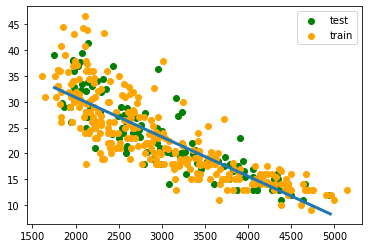

The r2 of the model is:  0.7332325331513996
The MSE of the model is:  15.59707792280155


In [18]:
r2, mse = Linear_Regression_model_with_plotting(auto_dataframe, "weight", "mpg", "green", "orange")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

### - Acceleration vs mpg

As it can be seen in the following scatter plot, the relationship between acceleration and mpg is not linear, but follows a tendency to linearity, however is the one until now which has the most dispersed data so we would obtain the lowest score and maximum mean squared error over the ones we already analysed.

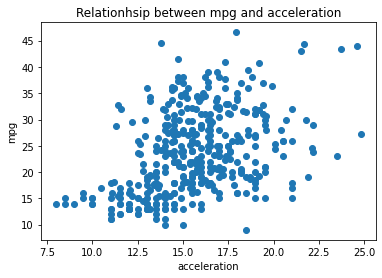

In [19]:
plotting_one_variable_against_the_other(auto_dataframe, 'acceleration', 'mpg', 'Relationhsip between mpg and acceleration')

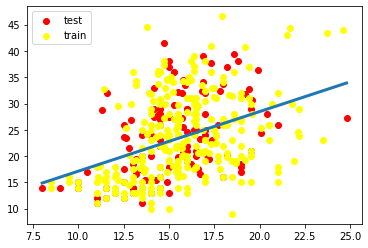

The r2 of the model is:  0.21662928220518096
The MSE of the model is:  45.80129006068447


In [20]:
r2, mse = Linear_Regression_model_with_plotting(auto_dataframe, "acceleration", "mpg", "red", "yellow")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

### - Horsepower vs mpg

As it can be seen in the following scatter plot, the relationship between acceleration and mpg is not linear, but follows a tendency to linearity, its score should be higher than the one of acceleration since it has less disperse data but lower than the one of displacement and weight.

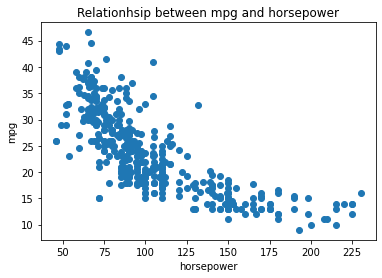

In [21]:
plotting_one_variable_against_the_other(auto_dataframe, 'horsepower', 'mpg', 'Relationhsip between mpg and horsepower')

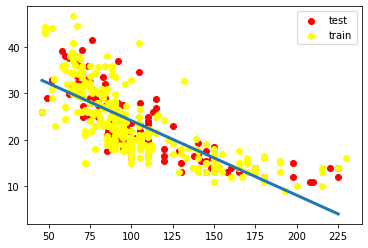

The r2 of the model is:  0.6182701725420195
The MSE of the model is:  22.318575554412472


In [22]:
r2, mse = Linear_Regression_model_with_plotting(auto_dataframe, "horsepower", "mpg", "red", "yellow")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

## Correlation matrix

Up to this point we have only take into account one variable to make the prediction of **mpg**. Therefore, in order to use more variables we need to know which are the ones that have more influence on the target variable (**mpg**). That is why we compute in the following cell the correlation matrix of our dataframe.

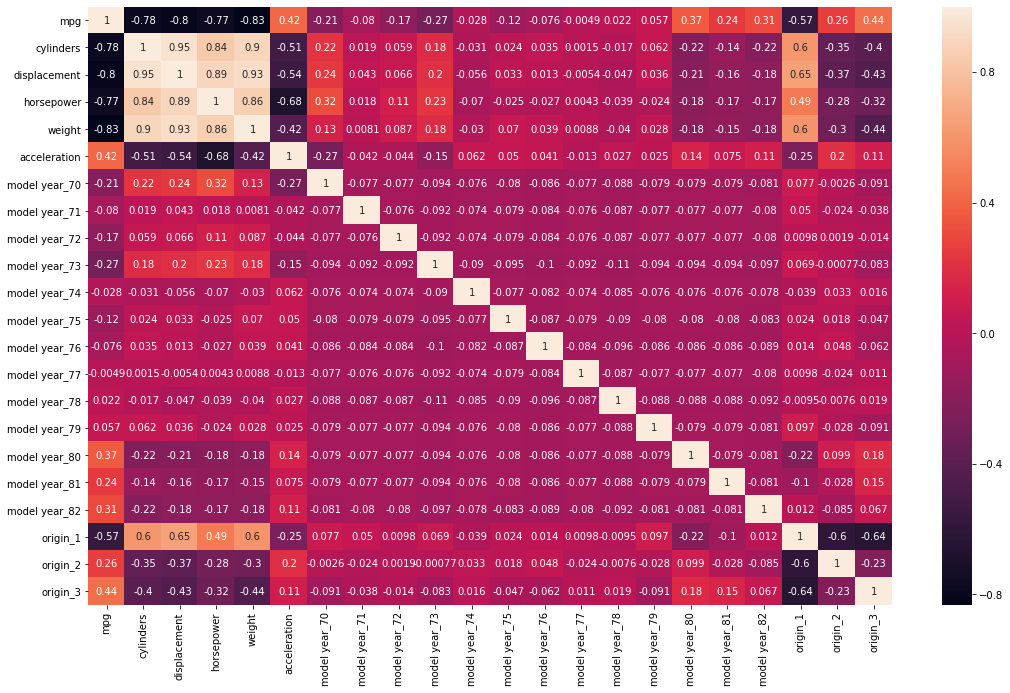

In [23]:
f, ax = plt.subplots(figsize=(18, 11))
correlation_matrix = auto_dataframe.corr()
sn.heatmap(correlation_matrix, annot=True)
plt.show()

After having performed the correlation matrix, it can be perceived that the more relevant features are:

   * **Cylinders** with a negative correlation of **0.78**.
   * **Displacement** with a negative correlation of **0.8**.
   * **Horsepower** with a negative correlation of **0.77**.
   * **Weight** with a negative correlation of **0.83**.
   * **Acceleration** with a positive correlation **0.42**.
   * **Origin_1** with a negative correlation of **0.57**.
   * **Origin_3** with a positive correlation of **0.44**.

## LinearRegression() model with the following features: horsepower, cylinders, displacement, weight, acceleration, origin_1, origin_3.

In [24]:
r2, mse = Linear_Regression_model(auto_dataframe, ["horsepower", "cylinders", "displacement", "weight", "acceleration", "origin_1", "origin_3"], "mpg")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

The r2 of the model is:  0.7711873165014407
The MSE of the model is:  13.377977818703732


## LinearRegression() model with the following features: horsepower, cylinders, displacement, weight and acceleration.

In [25]:
r2, mse = Linear_Regression_model(auto_dataframe, ["horsepower", "cylinders", "displacement", "weight", "acceleration"], "mpg")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

The r2 of the model is:  0.7478189574129674
The MSE of the model is:  14.744254306375217


## Linear Regression() model with the following features: horsepower, cylinders, displacement, weight, acceleration, origin_1, origin_3, model year_80 and model year_82.

In [26]:
r2, mse = Linear_Regression_model(auto_dataframe, ["horsepower", "cylinders", "displacement", "weight", "acceleration", "origin_1", "origin_3", "model year_80", "model year_82"], "mpg")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

The r2 of the model is:  0.7964677338194309
The MSE of the model is:  11.899909134063801


## LinearRegression() model with the following features: horsepower, cylinders, displacement, weight, acceleration, origin_1, origin_3, model year_80, model year_82 and origin_2.

In [27]:
r2, mse = Linear_Regression_model(auto_dataframe,["horsepower", "cylinders", "displacement", "weight", "acceleration", "origin_1", "origin_3", "model year_80", "model year_82", "origin_2"] , "mpg")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

The r2 of the model is:  0.7964677338194285
The MSE of the model is:  11.899909134063945


## LinearRegression() model with the following features: horsepower, cylinders, displacement, weight, origin_1, origin_3, model year_80, model year_82 and origin_2.

In [28]:
r2, mse = Linear_Regression_model(auto_dataframe,["horsepower", "cylinders", "displacement", "weight", "origin_1", "origin_3", "model year_80", "model year_82", "origin_2"] , "mpg")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

The r2 of the model is:  0.8021991130000865
The MSE of the model is:  11.564812921838866


## LinearRegression() model with the following features: horsepower, cylinders, displacement and weight.

In [29]:
r2, mse = Linear_Regression_model(auto_dataframe,["horsepower", "cylinders", "displacement", "weight"] , "mpg")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

The r2 of the model is:  0.749052424253315
The MSE of the model is:  14.672137272572845


## LinearRegression() model with all predictor variables

In [30]:
all_columns = auto_dataframe.columns.to_list()
print(all_columns)
target_column = all_columns.pop(0)
print(all_columns)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year_70', 'model year_71', 'model year_72', 'model year_73', 'model year_74', 'model year_75', 'model year_76', 'model year_77', 'model year_78', 'model year_79', 'model year_80', 'model year_81', 'model year_82', 'origin_1', 'origin_2', 'origin_3']
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year_70', 'model year_71', 'model year_72', 'model year_73', 'model year_74', 'model year_75', 'model year_76', 'model year_77', 'model year_78', 'model year_79', 'model year_80', 'model year_81', 'model year_82', 'origin_1', 'origin_2', 'origin_3']


In [31]:
r2, mse = Linear_Regression_model(auto_dataframe, all_columns, "mpg")
print("The r2 of the model is: ", r2)
print("The MSE of the model is: ", mse)

The r2 of the model is:  0.8441179746030206
The MSE of the model is:  9.113945285767045


## Defining the functions to build cross-validation regressors

In [32]:
def cross_val_score_calculation_rmse(instance, X, y, cv):
    MSE_CV_scores = - cross_val_score(instance, X, y, cv = cv, scoring = 'neg_mean_squared_error', n_jobs = -1)
    model_rmse_cv = (MSE_CV_scores.mean())**(1/2)
    return model_rmse_cv

def rmse_training_data(instance, X_train, y_train):
    instance.fit(X_train, y_train)
    y_pred_train = instance.predict(X_train)
    RMSE_train =(mean_squared_error(y_train, y_pred_train))**(1/2)
    return RMSE_train

def cross_val_score_calculation_r2(instance, X, y, cv):
    R2_scores= cross_val_score(instance, X, y, cv=cv, 
                       scoring='r2')
    R2_score = R2_scores.mean()
    return R2_score

In [33]:
split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
X = auto_dataframe.drop("mpg", axis = 1)
y = auto_dataframe["mpg"]
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

lr_rmse_cv = cross_val_score_calculation_rmse(model, X, y, split)

print("The CV RMSE of the model is: " ,lr_rmse_cv)

RMSE_train_lr = rmse_training_data(model, X_train, y_train)

print("The CV RMSE of the training set is: " ,RMSE_train_lr)

R2_score = cross_val_score_calculation_r2(model, X, y, split)

print("The r2 of the model is: ",R2_score)


The CV RMSE of the model is:  3.2236235205136508
The CV RMSE of the training set is:  3.012057549787199
The r2 of the model is:  0.8174138344824357


## Scaling our data



In [34]:
# Get column names first
names = auto_dataframe.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_dataframe = scaler.fit_transform(auto_dataframe)
scaled_dataframe = pd.DataFrame(scaled_dataframe, columns=names)
print(scaled_dataframe)

          mpg  cylinders  displacement  horsepower    weight  acceleration  \
0   -0.706439   1.498191      1.090604    0.669196  0.630870     -1.295498   
1   -1.090751   1.498191      1.503514    1.586599  0.854333     -1.477038   
2   -0.706439   1.498191      1.196232    1.193426  0.550470     -1.658577   
3   -0.962647   1.498191      1.061796    1.193426  0.546923     -1.295498   
4   -0.834543   1.498191      1.042591    0.931311  0.565841     -1.840117   
..        ...        ...           ...         ...       ...           ...   
393  0.446497  -0.856321     -0.513026   -0.484111 -0.213324      0.011586   
394  2.624265  -0.856321     -0.925936   -1.375302 -0.993671      3.279296   
395  1.087017  -0.856321     -0.561039   -0.536534 -0.798585     -1.440730   
396  0.574601  -0.856321     -0.705077   -0.667591 -0.408411      1.100822   
397  0.958913  -0.856321     -0.714680   -0.588957 -0.296088      1.391285   

     model year_70  model year_71  model year_72  model year_73

## Defining the function to plot our scaled data within a range (-5,5)

In [35]:
def histogram_plotting_with_range(dataframe, column, name, number_of_bins, range1):
    dataframe[column].plot.hist(bins=number_of_bins, range= range1)
    plt.xlabel(name)
    plt.show

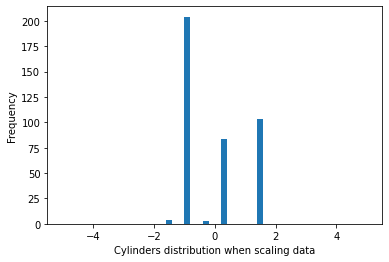

In [36]:
histogram_plotting_with_range(scaled_dataframe, 'cylinders', 'Cylinders distribution when scaling data', 50, [-5,5])

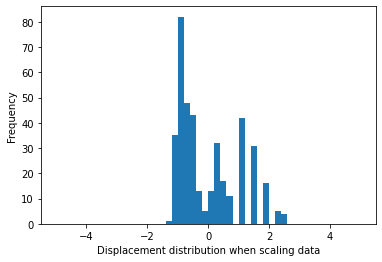

In [37]:
histogram_plotting_with_range(scaled_dataframe, 'displacement', 'Displacement distribution when scaling data', 50, [-5,5])

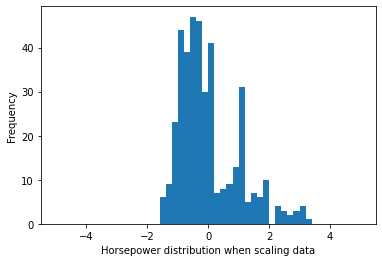

In [38]:
histogram_plotting_with_range(scaled_dataframe, 'horsepower', 'Horsepower distribution when scaling data', 50, [-5,5])

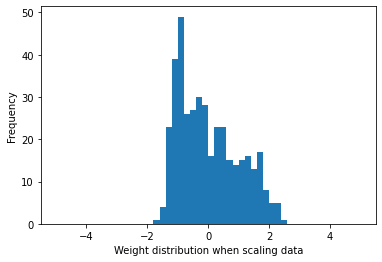

In [39]:
histogram_plotting_with_range(scaled_dataframe, 'weight', 'Weight distribution when scaling data', 50, [-5,5])

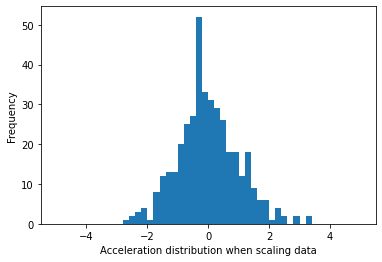

In [40]:
histogram_plotting_with_range(scaled_dataframe, 'acceleration', 'Acceleration distribution when scaling data', 50, [-5,5])

# Cross-validation regression models tested

## Ridge regression



In [41]:
X = scaled_dataframe.drop("mpg", axis = 1)
y = scaled_dataframe["mpg"]

split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

# Create a model which will be used with tuned hyperparameters.
ridge_model = Ridge()

# 1 hyperparameter will be tuned --> alpha, which is the penalty I referred to in the document.
parameters = {'alpha': [1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}

# Select the best hyperparameter value, based on NRMSE
ridge_cv = GridSearchCV(ridge_model, parameters, scoring = 'neg_mean_squared_error', cv = split)

ridge_cv.fit(X,y)

# Create a model with the optimal hyperparameters
ridge_final = Ridge(alpha=ridge_cv.best_params_["alpha"])

ridge_rmse_cv = cross_val_score_calculation_rmse(ridge_final, X, y, split)

print("The CV RMSE of the model is: " ,ridge_rmse_cv)

train = rmse_training_data(ridge_final, X_train, y_train)

print("The CV RMSE of the training set is: " ,train)

print(ridge_cv.best_params_)

# Select the best hyperparameter again but based on r2
ridge_cv2 = GridSearchCV(ridge_model, parameters, scoring = 'r2', cv = split)

ridge_cv2.fit(X,y)

ridge_final_2 = Ridge(alpha=ridge_cv2.best_params_["alpha"])

r2 = cross_val_score_calculation_r2(ridge_final_2, X, y, split)

print("The r2 of the model is: " , r2)




The CV RMSE of the model is:  0.41295898472092596
The CV RMSE of the training set is:  3.0120575497871993
{'alpha': 1e-10}


C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.36383e-19): result may not be accurate.
  overwrite_a=True).T


The r2 of the model is:  0.8174138344824007


## Lasso regression

In [42]:
X = scaled_dataframe.drop("mpg", axis = 1)
y = scaled_dataframe["mpg"]

split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

# Create a model which will be used with tuned hyperparameters.
lasso_model = Lasso()

# 1 hyperparameter will be tuned --> alpha, which is the penalty I referred to in the document.
parameters = {'alpha': [1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}

# Select the best hyperparameter value, based on NRMSE
lasso_cv = GridSearchCV(lasso_model, parameters, scoring = 'neg_mean_squared_error', cv = split)

lasso_cv.fit(X,y)

# Create a model with the optimal hyperparameters
lasso_final = Lasso(alpha=lasso_cv.best_params_["alpha"])

lasso_rmse_cv = cross_val_score_calculation_rmse(lasso_final, X, y, split)

print("The CV RMSE of the model is: " ,lasso_rmse_cv)

lasso_train = rmse_training_data(lasso_final, X_train, y_train)

print("The CV RMSE of the training set is: " ,lasso_train)

print(lasso_cv.best_params_)

# Select the best hyperparameter again but based on r2
lasso_cv2 = GridSearchCV(lasso_model, parameters, scoring = 'r2', cv = split)

lasso_cv2.fit(X,y)

lasso_final_2 = Lasso(alpha=lasso_cv2.best_params_["alpha"])

lasso_r2 = cross_val_score_calculation_r2(lasso_final_2, X, y, split)

print("The r2 of the model is: " , lasso_r2)


C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4302732116913006, tolerance: 0.028275019900990146
  positive)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6033543689340988, tolerance: 0.02893897697763638
  positive)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4660100847446955, tolerance: 0.03012234525484023
  positive)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

The CV RMSE of the model is:  0.41295843263418924
The CV RMSE of the training set is:  3.012057552124037
{'alpha': 1e-05}


C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.597567198817238, tolerance: 0.02701978092322696
  positive)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.609714066426676, tolerance: 0.027888259468413425
  positive)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.43027689969054705, tolerance: 0.028275019900990146
  positive)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

The r2 of the model is:  0.8174143898355315


C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7106007583056311, tolerance: 0.039799999999999995
  positive)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4332439589578527, tolerance: 0.028275019900990146
  positive)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6059778992700942, tolerance: 0.02893897697763638
  positive)
C:\Users\Alex\FinalAnaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

## Decision Tree Regression


In [43]:
X = auto_dataframe.drop("mpg", axis = 1)
y = auto_dataframe["mpg"]

split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

# Create a model which will be used with tuned hyperparameters.
decision_tree_model = DecisionTreeRegressor()

# 2 hyperparameters will be tuned --> max_depth, min_samples_leaf
parameters = {'max_depth': [2,3,4,5,6], "min_samples_leaf": [0.1, 0.12, 0.14, 0.16, 0.18]}

# Select the best hyperparameter value, based on NRMSE
decision_tree_cv = GridSearchCV(decision_tree_model, parameters, scoring = 'neg_mean_squared_error', cv = split)

decision_tree_cv.fit(X,y)

# Create a model with the optimal hyperparameters
dt = DecisionTreeRegressor(max_depth = decision_tree_cv.best_params_['max_depth'], min_samples_leaf=decision_tree_cv.best_params_['min_samples_leaf'])

decision_tree_rmse_cv = cross_val_score_calculation_rmse(dt, X, y, split)

print("The CV RMSE of the model is: " ,decision_tree_rmse_cv)

dt_train= rmse_training_data(dt, X_train, y_train)

print("The CV RMSE of the training set is: " ,dt_train)

print(decision_tree_cv.best_params_)

# Select the best hyperparameter again but based on r2
decision_tree_cv2 = GridSearchCV(decision_tree_model, parameters, scoring = 'r2', cv = split)

decision_tree_cv2.fit(X,y)

decision_tree_final_2 = DecisionTreeRegressor(max_depth = decision_tree_cv2.best_params_['max_depth'], min_samples_leaf=decision_tree_cv2.best_params_['min_samples_leaf'])

dt_r2 = cross_val_score_calculation_r2(decision_tree_final_2, X, y, split)

print("The r2 of the model is: " ,dt_r2)


The CV RMSE of the model is:  4.1681364775766765
The CV RMSE of the training set is:  3.9649517018902674
{'max_depth': 5, 'min_samples_leaf': 0.1}
The r2 of the model is:  0.6937307690316958


## Random Forest Regression



In [44]:
X = auto_dataframe.drop("mpg", axis = 1)
y = auto_dataframe["mpg"]

split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

# Create a model which will be used with tuned hyperparameters.
random_forest_model = RandomForestRegressor()

# 2 hyperparameters will be tuned --> n_estimators, min_samples_leaf
parameters = {"n_estimators": [20,50,100,200,300,400], "min_samples_leaf": [0.1, 0.12, 0.14, 0.16, 0.18]}

# Select the best hyperparameter value, based on NRMSE
random_forest_cv = GridSearchCV(random_forest_model, parameters, scoring = 'neg_mean_squared_error', cv = split)

random_forest_cv.fit(X,y)

# Create a model with the optimal hyperparameters
rf_final = RandomForestRegressor(n_estimators=random_forest_cv.best_params_["n_estimators"], min_samples_leaf=random_forest_cv.best_params_["min_samples_leaf"])

random_forest_rmse_cv = cross_val_score_calculation_rmse(rf_final, X, y, split)

print("The CV RMSE of the model is: " ,random_forest_rmse_cv)

rf_train= rmse_training_data(rf_final, X_train, y_train)

print("The CV RMSE of the training set is: " ,rf_train)

print(random_forest_cv.best_params_)

# Select the best hyperparameter again but based on r2
rf_cv2 = GridSearchCV(random_forest_model, parameters, scoring = 'r2', cv = split)

rf_cv2.fit(X,y)

random_forest_final_2 = RandomForestRegressor(n_estimators=rf_cv2.best_params_["n_estimators"], min_samples_leaf=rf_cv2.best_params_["min_samples_leaf"])

rf_r2 = cross_val_score_calculation_r2(random_forest_final_2, X, y, split)

print("The r2 of the model is: " ,rf_r2)


The CV RMSE of the model is:  3.9852508732660357
The CV RMSE of the training set is:  3.8745394660701074
{'min_samples_leaf': 0.1, 'n_estimators': 50}
The r2 of the model is:  0.7197030762350458


## Adaboost Regressor

In [45]:
X = auto_dataframe.drop("mpg", axis = 1)
y = auto_dataframe["mpg"]

split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

decision_tree_model2 = dt

# Create a model which will be used with tuned hyperparameters.
Adaboost_model = AdaBoostRegressor(base_estimator=decision_tree_model2)

# 1 hyperparameter will be tuned --> n_estimators
parameters = {"n_estimators": [20,50,100,200,300,400]}

# Select the best hyperparameter value, based on NRMSE
Adaboost_cv = GridSearchCV(Adaboost_model, parameters, scoring = 'neg_mean_squared_error', cv = split)

Adaboost_cv.fit(X,y)

# Create a model with the optimal hyperparameters
Adaboost_final = AdaBoostRegressor(n_estimators=Adaboost_cv.best_params_["n_estimators"])

adaboost_rmse_cv = cross_val_score_calculation_rmse(Adaboost_final, X, y, split)

print("The CV RMSE of the model is: " ,adaboost_rmse_cv)

adaboost_train= rmse_training_data(Adaboost_final, X_train, y_train)

print("The CV RMSE of the training set is: " ,adaboost_train)

print(Adaboost_cv.best_params_)

# Select the best hyperparameter again but based on r2
Adaboost_cv2 = GridSearchCV(Adaboost_model, parameters, scoring = 'r2', cv = split)

Adaboost_cv2.fit(X,y)

Adaboost_final_2 = AdaBoostRegressor(n_estimators=Adaboost_cv2.best_params_["n_estimators"])

adaboost_r2 = cross_val_score_calculation_r2(Adaboost_final_2, X, y, split)

print("The r2 of the model is: " ,adaboost_r2)


The CV RMSE of the model is:  3.8293501501516976
The CV RMSE of the training set is:  2.9191103095882522
{'n_estimators': 20}
The r2 of the model is:  0.7426685051776883


## Bagging Regressor

In [46]:
X = auto_dataframe.drop("mpg", axis = 1)
y = auto_dataframe["mpg"]

split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

decision_tree_model2 = dt

# Create a model which will be used with tuned hyperparameters.
Bagging_model = BaggingRegressor(base_estimator=decision_tree_model2)

# 1 hyperparameter will be tuned --> n_estimators
parameters = {"n_estimators": [20,50,100,200,300,400]}

# Select the best hyperparameter value, based on NRMSE
Bagging_cv = GridSearchCV(Bagging_model, parameters, scoring = 'neg_mean_squared_error', cv = split)

Bagging_cv.fit(X,y)

# Create a model with the optimal hyperparameters
Bagging_final = BaggingRegressor(n_estimators=Bagging_cv.best_params_["n_estimators"])

bagging_rmse_cv = cross_val_score_calculation_rmse(Bagging_final, X, y, split)

print("The CV RMSE of the model is: " ,bagging_rmse_cv)

bagging_train = rmse_training_data(Bagging_final, X_train, y_train)

print("The CV RMSE of the training set is: " ,bagging_train)

print(Bagging_cv.best_params_)

# Select the best hyperparameter again but based on r2.
Bagging_cv2 = GridSearchCV(Bagging_model, parameters, scoring = 'r2', cv = split)

Bagging_cv2.fit(X,y)

Bagging_final_2 = BaggingRegressor(n_estimators=Bagging_cv2.best_params_["n_estimators"])

Bagging_r2 = cross_val_score_calculation_r2(Bagging_final_2, X, y, split)

print("The r2 of the model is: " ,Bagging_r2)

The CV RMSE of the model is:  3.5121670186178036
The CV RMSE of the training set is:  1.501679186010728
{'n_estimators': 20}
The r2 of the model is:  0.7954807291314454


## Gradient Boosting Regressor

In [47]:
X = auto_dataframe.drop("mpg", axis = 1)
y = auto_dataframe["mpg"]

split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

# Create a model which will be used with tuned hyperparameters.
gradient_boosting_model = GradientBoostingRegressor()

# 3 hyperparameters will be tuned --> n_estimators, min_samples_leaf, max_depth
parameters = {"n_estimators": [20,50,100,200,300,400], "min_samples_leaf": [0.1, 0.12, 0.14, 0.16, 0.18], "max_depth":[2,3,4,5,6]}

# Select the best hyperparameter value, based on NRMSE
gradient_boosting_cv = GridSearchCV(gradient_boosting_model, parameters, scoring = 'neg_mean_squared_error', cv = split)

gradient_boosting_cv.fit(X,y)

# Create a model with the optimal hyperparameters
gradient_boosting_final = GradientBoostingRegressor(n_estimators=gradient_boosting_cv.best_params_["n_estimators"], min_samples_leaf=gradient_boosting_cv.best_params_["min_samples_leaf"], max_depth=gradient_boosting_cv.best_params_["max_depth"])

gradient_boosting_rmse_cv = cross_val_score_calculation_rmse(gradient_boosting_final, X, y, split)

print("The CV RMSE of the model is: " ,gradient_boosting_rmse_cv)

gradient_boosting_train = rmse_training_data(gradient_boosting_final, X_train, y_train)

print("The CV RMSE of the training set is: " ,gradient_boosting_train)

print(gradient_boosting_cv.best_params_)

# Select the best hyperparameter again but based on r2.
gradient_boosting_cv2 = GridSearchCV(gradient_boosting_model, parameters, scoring = 'r2', cv = split)

gradient_boosting_cv2.fit(X,y)

gradient_boosting_2 = GradientBoostingRegressor(n_estimators=gradient_boosting_cv2.best_params_["n_estimators"], min_samples_leaf=gradient_boosting_cv2.best_params_["min_samples_leaf"], max_depth=gradient_boosting_cv2.best_params_["max_depth"])

gradient_boosting_r2 = cross_val_score_calculation_r2(gradient_boosting_2, X, y, split)

print("The r2 of the model is: " ,gradient_boosting_r2)


The CV RMSE of the model is:  3.8647800654288593
The CV RMSE of the training set is:  3.443385672135955
{'max_depth': 2, 'min_samples_leaf': 0.1, 'n_estimators': 100}
The r2 of the model is:  0.737516632347543


## Stochastic Gradient Boosting Regressor



In [48]:
X = auto_dataframe.drop("mpg", axis = 1)
y = auto_dataframe["mpg"]

split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

# Create a model which will be used with tuned hyperparameters.
stochastic_gradient_boosting_model = GradientBoostingRegressor()

# 5 hyperparameters will be tuned --> n_estimators, min_samples_leaf, max_depth, subsample, max_features
parameters = {"n_estimators": [20,50,100,200,300,400], "min_samples_leaf": [0.1, 0.12, 0.14, 0.16, 0.18], "max_depth":[2,3,4,5,6], "subsample":[0.2, 0.4, 0.6, 0.8], "max_features":[0.2, 0.4, 0.6, 0.8]}

# Select the best hyperparameter value, based on NRMSE
stochastic_gradient_boosting_cv = GridSearchCV(stochastic_gradient_boosting_model, parameters, scoring = 'neg_mean_squared_error', cv = split)

stochastic_gradient_boosting_cv.fit(X,y)

# Create a model with the optimal hyperparameters
stochastic_gradient_boosting_final = GradientBoostingRegressor(n_estimators=stochastic_gradient_boosting_cv.best_params_["n_estimators"], min_samples_leaf=stochastic_gradient_boosting_cv.best_params_["min_samples_leaf"], max_depth=stochastic_gradient_boosting_cv.best_params_["max_depth"], subsample=stochastic_gradient_boosting_cv.best_params_["subsample"], max_features=stochastic_gradient_boosting_cv.best_params_["max_features"])

stochastic_gradient_boosting_rmse_cv = cross_val_score_calculation_rmse(stochastic_gradient_boosting_final, X, y, split)

print("The CV RMSE of the model is: " ,stochastic_gradient_boosting_rmse_cv)

stochastic_gradient_boosting_train = rmse_training_data(stochastic_gradient_boosting_final, X_train, y_train)

print("The CV RMSE of the training set is: " ,stochastic_gradient_boosting_train)

print(stochastic_gradient_boosting_cv.best_params_)

# Select the best hyperparameter again but based on r2.
stochastic_gradient_boosting_cv2 = GridSearchCV(stochastic_gradient_boosting_model, parameters, scoring = 'r2', cv = split)

stochastic_gradient_boosting_cv2.fit(X,y)

stochastic_gradient_boosting_2 = GradientBoostingRegressor(n_estimators=stochastic_gradient_boosting_cv2.best_params_["n_estimators"], min_samples_leaf=stochastic_gradient_boosting_cv2.best_params_["min_samples_leaf"], max_depth=stochastic_gradient_boosting_cv2.best_params_["max_depth"], subsample=stochastic_gradient_boosting_cv2.best_params_["subsample"], max_features=stochastic_gradient_boosting_cv2.best_params_["max_features"])

stochastic_gradient_boosting_r2 = cross_val_score_calculation_r2(stochastic_gradient_boosting_2, X, y, split)

print("The r2 of the model is: " ,stochastic_gradient_boosting_r2)


The CV RMSE of the model is:  3.8872824833011723
The CV RMSE of the training set is:  3.7161712654010137
{'max_depth': 5, 'max_features': 0.2, 'min_samples_leaf': 0.14, 'n_estimators': 100, 'subsample': 0.8}
The r2 of the model is:  0.7322576488363598


## Final models evaluation

In [49]:
models_performance = [('Linear Regression', lr_rmse_cv),
                     ('Ridge Regression', ridge_rmse_cv),
                     ('Lasso Regression', lasso_rmse_cv),
                     ('Decision-Tree Regressor', decision_tree_rmse_cv),
                     ('Random Forest Regressor', random_forest_rmse_cv),
                     ('AdaBoost Regressor', adaboost_rmse_cv),
                     ('Bagging Regressor', bagging_rmse_cv),
                     ('Gradient Boosting Regressor', gradient_boosting_rmse_cv),
                     ('Stochastic Gradient Boosting Regressor', stochastic_gradient_boosting_rmse_cv),
                     ]

models_performance = sorted(models_performance, key = lambda x: x[1])

models_final_evaluation = pd.DataFrame(data = models_performance, columns=['Regression Model', 'CV RMSE'])
print(models_final_evaluation)

                         Regression Model   CV RMSE
0                        Lasso Regression  0.412958
1                        Ridge Regression  0.412959
2                       Linear Regression  3.223624
3                       Bagging Regressor  3.512167
4                      AdaBoost Regressor  3.829350
5             Gradient Boosting Regressor  3.864780
6  Stochastic Gradient Boosting Regressor  3.887282
7                 Random Forest Regressor  3.985251
8                 Decision-Tree Regressor  4.168136


## Final conclusion

   * As it can be appreciated from the previous table the model that will predict better future observations, since is the one with lower CV RMSE would be the Lasso regressor, which means that assigning some coefficients to zero has a good result on model performance. However, the difference between ridge regressor and lasso regressor is infimum in this particular case.
   
   * We can also appreciate that for this particular case, bagging techniques besides random forest regressor, perform better than boosting techniques.
   
   * As it was specified from the beginning, most of the features seem to follow a linear tendency, which can be reflected in the fact that the RMSE of LinearRegression is among the 3 lowest values.